In [1]:
import pandas as pd
import string
from collections import Counter
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/EL/cyberbullying_tweets.csv")

In [4]:
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


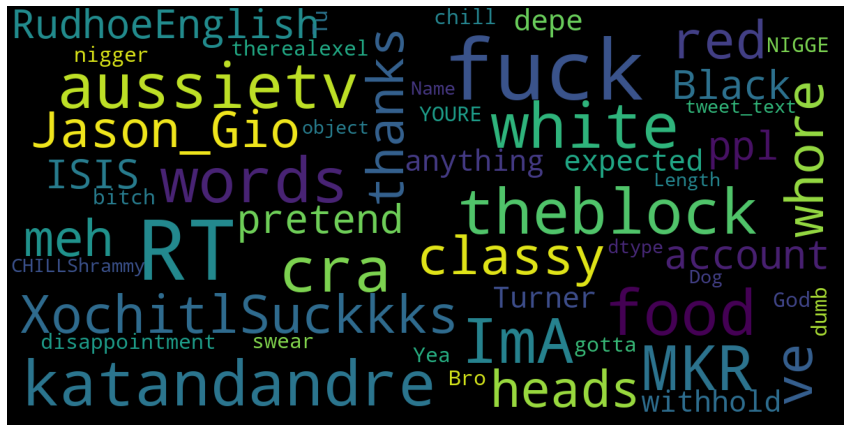

In [11]:
def show_wordcloud(data, title = None):
  '''Show the words that people have used the most in their tweets'''
  wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(str(data))

  fig = plt.figure(1, figsize=(15, 15))
  plt.axis('off')
  if title: 
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)

  plt.imshow(wordcloud)
  plt.show()

show_wordcloud(df['tweet_text'])

In [12]:
df.cyberbullying_type.value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [13]:
# introduce temporary column to seperate words
df["list_of_words"] = df['tweet_text'].apply(lambda x: x.split()) 

In [14]:
# count length of tweets
df["characters per tweet"] = df['tweet_text'].apply(lambda x: len(x))
df["words per tweet"] = df['tweet_text'].apply(lambda x: len(x.split()))

In [15]:
# identify word shape: 

# all upper
df["nb_upper"] = df["list_of_words"].apply(lambda x: sum(1 for c in x if c.isupper()))

# all lower
df["nb_lower"] = df["list_of_words"].apply(lambda x: sum(1 for c in x if c.islower()))

# capitalized  #first char upper, others lower 
count_capitalized  = lambda x: sum([(a[0].isupper() and a[1:].islower()) for a in x if len(a)>1])
df["nb_capitalized"] = df["list_of_words"].apply(count_capitalized)


# camelcase https://www.dictionary.com/browse/camelcase
# simplification = word element beginning with an uppercase letter that is not in nb_upper and not in
# nb_capitalized 
count_camel_case = lambda x: sum([(a[0].isupper() and
                                       (not a[1:].islower() and not a[1:].isupper())) for a in x if len(a)>1])
df["mixed_upper_lower_not_capitalized"] = df["list_of_words"].apply(count_camel_case)

# count how many words have the length x+1 for x in range(20)
for i in range(20):
    count_len = lambda x: sum([len(a)==i+1 for a in x])
    df[f"nb_len_{i+1}"] = df["list_of_words"].apply(count_len)
    
# remove the help column 
df.drop("list_of_words", axis=1,inplace=True)


In [16]:
#reset index
df = df.reset_index(drop=True)

In [17]:
df.head() 

,tweet_text,cyberbullying_type,characters per tweet,words per tweet,nb_upper,nb_lower,nb_capitalized,mixed_upper_lower_not_capitalized,nb_len_1,nb_len_2,...,nb_len_11,nb_len_12,nb_len_13,nb_len_14,nb_len_15,nb_len_16,nb_len_17,nb_len_18,nb_len_19,nb_len_20
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61,9,0,8,1,0,0,1,...,0,0,2,0,0,0,0,0,0,0
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115,14,1,9,1,0,0,2,...,1,0,0,1,1,0,0,0,0,0
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60,9,0,7,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103,18,1,16,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103,18,1,12,4,0,1,6,...,0,0,0,1,0,0,0,0,0,0


In [18]:
#get column names
df.columns

Index(['tweet_text', 'cyberbullying_type', 'characters per tweet',
       'words per tweet', 'nb_upper', 'nb_lower', 'nb_capitalized',
       'mixed_upper_lower_not_capitalized', 'nb_len_1', 'nb_len_2', 'nb_len_3',
       'nb_len_4', 'nb_len_5', 'nb_len_6', 'nb_len_7', 'nb_len_8', 'nb_len_9',
       'nb_len_10', 'nb_len_11', 'nb_len_12', 'nb_len_13', 'nb_len_14',
       'nb_len_15', 'nb_len_16', 'nb_len_17', 'nb_len_18', 'nb_len_19',
       'nb_len_20'],
      dtype='object')

In [19]:
df['tweet_text'].str.lower()

0        in other words #katandandre, your food was cra...
1        why is #aussietv so white? #mkr #theblock #ima...
2        @xochitlsuckkks a classy whore? or more red ve...
3        @jason_gio meh. :p  thanks for the heads up, b...
4        @rudhoeenglish this is an isis account pretend...
                               ...                        
47687    black ppl aren't expected to do anything, depe...
47688    turner did not withhold his disappointment. tu...
47689    i swear to god. this dumb nigger bitch. i have...
47690    yea fuck you rt @therealexel: if youre a nigge...
47691    bro. u gotta chill rt @chillshrammy: dog fuck ...
Name: tweet_text, Length: 47692, dtype: object

In [20]:
letters = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z",
           str(0),"1","2","3","4","5","6","7","8","9","?","!","@","$","&","#","%","(",")","-","+","=","/"]

In [21]:
lst = []
for index, row in df.iterrows(): 
    chars_in_string = Counter(row["tweet_text"])
    res = []
    for letter in letters:
        if letter in chars_in_string:
            res.append(chars_in_string[letter])
        else: 
            res.append(0) 
    lst.append(res)

df_temp = pd.DataFrame(lst, columns=letters, index=df.index)

In [22]:
df_temp.head()

,a,b,c,d,e,f,g,h,i,j,...,$,&,#,%,(,),-,+,=,/
0,5,0,2,4,2,1,0,1,3,0,...,0,0,2,0,0,0,0,0,0,0
1,3,3,2,4,10,0,1,4,7,0,...,0,0,10,0,0,0,0,0,0,0
2,3,0,5,1,6,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3,6,2,2,4,8,1,1,5,2,0,...,0,0,0,0,0,0,0,0,0,0
4,6,1,4,3,6,0,2,4,9,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df = df.join(df_temp)

In [24]:
df.head()

,tweet_text,cyberbullying_type,characters per tweet,words per tweet,nb_upper,nb_lower,nb_capitalized,mixed_upper_lower_not_capitalized,nb_len_1,nb_len_2,...,$,&,#,%,(,),-,+,=,/
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61,9,0,8,1,0,0,1,...,0,0,2,0,0,0,0,0,0,0
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115,14,1,9,1,0,0,2,...,0,0,10,0,0,0,0,0,0,0
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60,9,0,7,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103,18,1,16,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103,18,1,12,4,0,1,6,...,0,0,0,0,0,0,0,0,0,0


In [25]:
lst = []

for index, row in df.iterrows(): 
    non_ASCII = 0
    for c in row["tweet_text"]:
        if 0 <= ord(c) <= 127:
            pass
        else:
            non_ASCII += 1
     
    lst.append(non_ASCII)

df_temp = pd.DataFrame({'non_ASCII':lst},index=df.index)

In [26]:
df_temp.head()

,non_ASCII
0,0
1,0
2,0
3,0
4,0


In [27]:
df = df.join(df_temp)

In [28]:
df.head()

,tweet_text,cyberbullying_type,characters per tweet,words per tweet,nb_upper,nb_lower,nb_capitalized,mixed_upper_lower_not_capitalized,nb_len_1,nb_len_2,...,&,#,%,(,),-,+,=,/,non_ASCII
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61,9,0,8,1,0,0,1,...,0,2,0,0,0,0,0,0,0,0
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115,14,1,9,1,0,0,2,...,0,10,0,0,0,0,0,0,0,0
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60,9,0,7,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103,18,1,16,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103,18,1,12,4,0,1,6,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# from data frame to csv file
df.to_csv('style_data.csv')